In [1]:
import numpy as np
import pandas as pd

from luwiji.recommendation_system import illustration

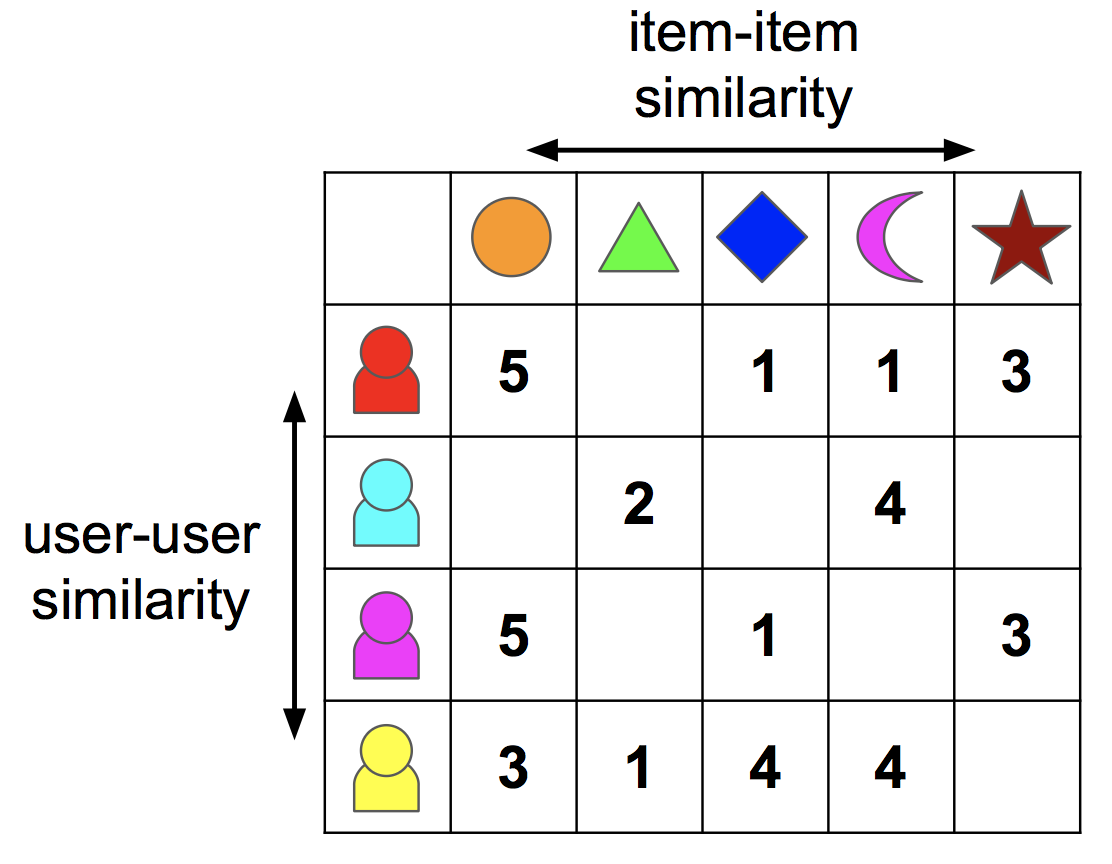

In [2]:
illustration.collaborative

In [3]:
df = pd.read_csv("data/collaborative_filtering.csv")
df.head()

,userId,movie,rating
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,1,James and the Giant Peach (1996),3
2,1,My Fair Lady (1964),3
3,1,Erin Brockovich (2000),4
4,1,"Bug's Life, A (1998)",5


In [4]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [5]:
data = Dataset.load_from_df(df, Reader())
trainset = data.build_full_trainset()

In [6]:
model = SVD()
model.fit(trainset)

In [7]:
model.predict(1, "My Fair Lady (1964)")

Prediction(uid=1, iid='My Fair Lady (1964)', r_ui=None, est=4.062572624679376, details={'was_impossible': False})

In [8]:
#Prediksi rating untuk film yang belum ditonton

In [9]:
user_id = 1

In [13]:
all_movies = df.movie.unique()
all_movies

array(["One Flew Over the Cuckoo's Nest (1975)",
       'James and the Giant Peach (1996)', 'My Fair Lady (1964)', ...,
       'White Boys (1999)', 'One Little Indian (1973)',
       'Five Wives, Three Secretaries and Me (1998)'], dtype=object)

## yang sudah di rating user 1 

In [11]:
watched = df[df.userId == 1].movie
watched.head()

0    One Flew Over the Cuckoo's Nest (1975)
1          James and the Giant Peach (1996)
2                       My Fair Lady (1964)
3                    Erin Brockovich (2000)
4                      Bug's Life, A (1998)
Name: movie, dtype: object

## Yang belum ditonton

In [17]:
not_watched = [movie for movie in all_movies if movie not in watched]
not_watched

["One Flew Over the Cuckoo's Nest (1975)",
 'James and the Giant Peach (1996)',
 'My Fair Lady (1964)',
 'Erin Brockovich (2000)',
 "Bug's Life, A (1998)",
 'Princess Bride, The (1987)',
 'Ben-Hur (1959)',
 'Christmas Story, A (1983)',
 'Snow White and the Seven Dwarfs (1937)',
 'Wizard of Oz, The (1939)',
 'Beauty and the Beast (1991)',
 'Gigi (1958)',
 'Miracle on 34th Street (1947)',
 "Ferris Bueller's Day Off (1986)",
 'Sound of Music, The (1965)',
 'Airplane! (1980)',
 'Tarzan (1999)',
 'Bambi (1942)',
 'Awakenings (1990)',
 'Big (1988)',
 'Pleasantville (1998)',
 'Wallace & Gromit: The Best of Aardman Animation (1996)',
 'Back to the Future (1985)',
 "Schindler's List (1993)",
 'Meet Joe Black (1998)',
 'Pocahontas (1995)',
 'E.T. the Extra-Terrestrial (1982)',
 'Titanic (1997)',
 'Ponette (1996)',
 'Close Shave, A (1995)',
 'Antz (1998)',
 'Girl, Interrupted (1999)',
 'Hercules (1997)',
 'Aladdin (1992)',
 'Mulan (1998)',
 'Hunchback of Notre Dame, The (1996)',
 'Last Days of Di

 ## Prediksi rating untuk film yang belum ditonton

In [19]:
score = [model.predict(user_id, movie).est for movie in not_watched]
score

[4.462602286212382,
 3.401923749135373,
 4.062572624679376,
 4.180806617317678,
 4.255335876686973,
 3.9251725841668765,
 4.360332930345648,
 4.596889415501356,
 4.316006803510092,
 4.497079008311294,
 4.449121477800303,
 3.6514714145444356,
 4.066495385707542,
 3.9964953046660914,
 4.594863730957852,
 4.112952688131959,
 4.0139358754361165,
 4.355617588808916,
 4.416355767925701,
 4.148077616235643,
 3.903689807076427,
 4.312855928822866,
 4.284546240414881,
 4.846336436593585,
 3.633303250522637,
 3.8732503748058567,
 4.431245550238018,
 4.4345426104260515,
 4.339190646235268,
 4.469122205960525,
 3.747534731283024,
 3.7557378654316125,
 3.345652475492614,
 4.24643293307258,
 4.05421829248493,
 3.885068246053774,
 3.559329739919756,
 4.269923430400155,
 4.620545490083505,
 4.6911052227855095,
 4.47287334905612,
 4.4133409317793575,
 4.166106754648031,
 3.98822668232176,
 4.269654215591469,
 4.287367377391206,
 4.1721798717260175,
 4.596029262179867,
 4.5701667699326105,
 3.9904624418